In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
def train_and_evaluate_models(X_train, y_train, X_val, y_val,test_x):
    """
    Train and evaluate multiple classification models on the given data.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_val: Validation features
    - y_val: Validation labels

    Returns:
    - A dictionary containing model names as keys and their accuracies on the validation data as values.
    """
    
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', C=1.0, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42)
    }

    accuracies = {}
    pred={}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_test=model.predict(test_x)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies[model_name] = accuracy
        pred[model_name]=y_pred_test
    print(accuracies)
    return accuracies,pred


In [ ]:
def cross_validation(x_train,y_train,x_valid,y_valid):
    classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ('Logistic Regression',LogisticRegression(max_iter=1000, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("SVM", SVC(kernel="linear"))]


    
    for model_name, model in classifiers:
        cross_val_scores = cross_val_score(model, X_train, Y_train, cv=5)
        print(f"{model_name} Cross-validation scores:", cross_val_scores)
        print(f"{model_name} Mean accuracy:", cross_val_scores.mean())
        print(f"{model_name} Standard deviation:", cross_val_scores.std())
        print("\n")

In [3]:
#function for knn model using and check accuarcy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def knn(train_x,train_y,valid_x,valid_y):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(train_x, train_y)
    y_pred = model.predict(valid_x)
    accuracy = accuracy_score(valid_y, y_pred)
    print(f'Accuracy using knn: {accuracy:.2f}')

In [4]:
#function for data preprocessing
from sklearn.preprocessing import StandardScaler
def preprocessing(label):
    train=pd.read_csv("/kaggle/input/ml-grp-project-train-data-set/train.csv")
    test=pd.read_csv("/kaggle/input/ml-grp-project-test-data-set/test.csv")
    valid=pd.read_csv("/kaggle/input/ml-grp-project-test-data-set/valid.csv")
    train_x_label_1=train.iloc[:, :-4]
    train_y_label_1=train.iloc[:,-5+label]

    ss = StandardScaler()
    scaled_train_x_label = ss.fit_transform(train_x_label_1)
    scaled_train_x_label
    scaled_test_x_label=ss.fit_transform(test_x_label_1)
    scaled_valid_x_label=ss.fit_transform(valid_x_label_1)
    return scaled_train_x_label,scaled_valid_x_label
    


In [5]:
# pca approch
from sklearn.decomposition import PCA
def pca(train_x,train_y,valid_x,valid_y,test_x):
    pca=PCA(.95, svd_solver='full')
    pca=pca.fit(train_x)
    train_features_pca=pca.transform(train_x)
    valid_features_pca=pca.transform(valid_x)
    test_features_pca=pca.transform(test_x)
    print("accuarcy after pca")
    #     knn(train_features_pca,train_y,valid_features_pca,valid_y)
    return train_features_pca,valid_features_pca,test_features_pca
    

In [6]:
# Write predicted values to a CSV file.
import pandas as pd

def write_predictions_to_csv(predictions, output_file):

    
    # Create a DataFrame with a column for predictions
    df = pd.DataFrame({'Predicted_Label': predictions})
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)  # Set index=False to exclude row numbers


In [7]:
train=pd.read_csv("/kaggle/input/ml-grp-project-train-data-set/train.csv")
test=pd.read_csv("/kaggle/input/ml-grp-project-test-data-set/test.csv")
valid=pd.read_csv("/kaggle/input/ml-grp-project-test-data-set/valid.csv")

In [8]:
train.head()
test.head()
valid.head()
train.info()
train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 168.0 MB


feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

In [9]:
#Check is there any NaN values
train.isnull().sum()
#check is there any duplicates in the data set
train.drop_duplicates()

#only label_2 has NaN values

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.019767,0.063323,-0.053509,-0.199206,-0.077987,-0.024195,-0.029862,-0.129485,0.078477,0.069051,...,0.123746,-0.045124,-0.061726,0.028198,0.024888,0.039199,39,29.0,1,6
28516,0.066528,0.029456,0.021956,0.002894,-0.034516,0.020519,0.099444,-0.080402,0.071025,-0.031894,...,-0.056049,0.030960,0.037558,-0.031431,-0.012858,-0.005033,39,29.0,1,6
28517,-0.058156,-0.032875,0.005609,-0.006116,-0.152900,-0.043931,-0.025087,-0.008506,0.030026,-0.012636,...,0.057833,-0.071774,-0.086787,0.074992,0.116150,-0.042498,39,29.0,1,6
28518,0.105208,0.065665,0.026605,0.091844,-0.052247,-0.071054,0.225280,-0.136209,0.002890,0.018416,...,-0.153156,0.046712,-0.045123,-0.038928,0.008563,-0.059361,39,29.0,1,6


In [10]:
#cheack is there any string values, if there any string values we can encode the values.
contains_strings=train.applymap(lambda x: isinstance(x, str))
if contains_strings.any().any():
    print("There are string values in the DataFrame columns.")
else:
    print("There are no string values in the DataFrame columns.")

There are no string values in the DataFrame columns.


label 1 

In [11]:
train_x_label_1=train.iloc[:, :-4]
train_y_label_1=train.iloc[:,-4:-3]
valid_x_label_1=valid.iloc[:, :-4]
valid_y_label_1=valid.iloc[:,-4:-3]
test_x_label_1=test.iloc[:, 1:]
train_x_label_1


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,-0.012747,0.065687,0.137501,-0.284607,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,-0.004775,0.021331,0.056852,-0.361596,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,-0.003266,0.057046,0.098336,-0.151976,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,-0.039695,0.041424,0.053399,0.004243,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028620,0.106456,0.054843,-0.202849,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.019767,0.063323,-0.053509,-0.199206,-0.077987,-0.024195,-0.029862,-0.129485,0.078477,0.069051,...,0.025718,0.068602,0.145404,-0.035701,0.123746,-0.045124,-0.061726,0.028198,0.024888,0.039199
28516,0.066528,0.029456,0.021956,0.002894,-0.034516,0.020519,0.099444,-0.080402,0.071025,-0.031894,...,-0.046978,-0.001441,0.003195,-0.162810,-0.056049,0.030960,0.037558,-0.031431,-0.012858,-0.005033
28517,-0.058156,-0.032875,0.005609,-0.006116,-0.152900,-0.043931,-0.025087,-0.008506,0.030026,-0.012636,...,-0.044351,0.092900,0.065189,0.024100,0.057833,-0.071774,-0.086787,0.074992,0.116150,-0.042498
28518,0.105208,0.065665,0.026605,0.091844,-0.052247,-0.071054,0.225280,-0.136209,0.002890,0.018416,...,0.087901,0.078238,0.021842,-0.003194,-0.153156,0.046712,-0.045123,-0.038928,0.008563,-0.059361


In [12]:
# knn(train_x_label_1,train_y_label_1,valid_x_label_1,valid_y_label_1)
# Accuracy using knn: 0.88

    

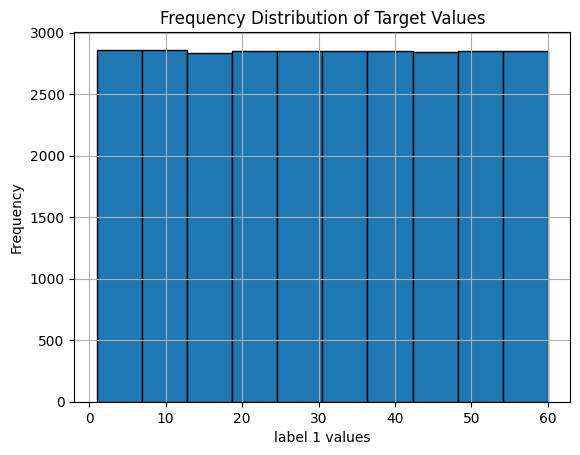

In [12]:
import matplotlib.pyplot as plt
plt.hist(train_y_label_1['label_1'], bins=10, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('label 1 values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Target Values')
plt.grid(True)

# Show the plot
plt.show()

In [14]:
train_and_evaluate_models(train_x_label_1, train_y_label_1, valid_x_label_1,valid_y_label_1,test_x_label_1)
cross_validation(train_x_label_1, train_y_label_1, valid_x_label_1,valid_y_label_1)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.9506666666666667, 'Logistic Regression': 0.9533333333333334}


{'SVM': 0.9506666666666667, 'Logistic Regression': 0.9533333333333334}

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_train_x_label_1 = ss.fit_transform(train_x_label_1)
scaled_train_x_label_1
scaled_test_x_label_1=ss.transform(test_x_label_1)
scaled_valid_x_label_1=ss.transform(valid_x_label_1)
train_and_evaluate_models(scaled_train_x_label_1, train_y_label_1, scaled_valid_x_label_1,valid_y_label_1)
print("""accuracy using standard scaling.{'SVM': 0.9386666666666666, 'Logistic Regression': 0.9626666666666667}""")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.9386666666666666, 'Logistic Regression': 0.9626666666666667}
accuracy using standard scaling.


In [13]:
# accuracy using RobustScaler
from sklearn.preprocessing import RobustScaler
ss = RobustScaler()
scaled_train_x_label_1 = ss.fit_transform(train_x_label_1)
scaled_train_x_label_1
scaled_test_x_label_1=ss.transform(test_x_label_1)
scaled_valid_x_label_1=ss.transform(valid_x_label_1)
acc,pred=train_and_evaluate_models(scaled_train_x_label_1,train_y_label_1,scaled_valid_x_label_1,valid_y_label_1,scaled_test_x_label_1)
print("accuracy using RobustScaler.")
y_pred_test=pred['Logistic Regression']

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Logistic Regression': 0.9613333333333334}
accuracy using RobustScaler.


In [14]:
write_predictions_to_csv(y_pred_test,"lgistic regression label 1 layer 8 after scaling.csv")

In [15]:
scaled_train_x_label_1_df = pd.DataFrame(scaled_train_x_label_1,columns = train_x_label_1.columns)
scaled_train_x_label_1_df.describe()
scaled_test_x_label_1_df=pd.DataFrame(scaled_test_x_label_1,columns=test_x_label_1.columns)
scaled_valid_x_label_1_df=pd.DataFrame(scaled_valid_x_label_1,columns=valid_x_label_1.columns)


In [16]:
scaled_train_x_label_1_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,28520.000000,28520.000000,2.852000e+04,28520.000000,2.852000e+04,28520.000000,2.852000e+04,28520.000000,28520.000000,28520.000000,...,28520.000000,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,28520.000000,28520.000000,28520.000000,28520.000000,2.852000e+04
mean,0.061308,-0.010346,1.712246e-02,-0.032236,-3.396451e-02,-0.020222,1.312498e-02,-0.042002,0.063105,0.007173,...,-0.041974,-1.318828e-02,-2.243570e-02,2.883115e-02,1.630532e-03,-0.016134,-0.044916,0.087165,0.026862,-3.029773e-02
std,0.738181,0.699241,7.237856e-01,0.766753,7.794873e-01,0.783886,6.971999e-01,0.757254,0.759340,0.794791,...,0.738270,7.409135e-01,7.708230e-01,7.190279e-01,7.509193e-01,0.764856,0.746770,0.817238,0.748851,7.662689e-01
min,-2.569209,-2.944316,-2.831251e+00,-2.933687,-4.313802e+00,-3.711785,-2.640687e+00,-3.207204,-3.266400,-3.247818,...,-3.159812,-3.064864e+00,-3.215357e+00,-2.392626e+00,-2.946521e+00,-2.995641,-3.354615,-3.390478,-2.861239,-2.687260e+00
25%,-0.453349,-0.515516,-4.947992e-01,-0.513784,-5.288901e-01,-0.503986,-5.045828e-01,-0.533670,-0.450825,-0.473336,...,-0.524446,-5.161375e-01,-5.112034e-01,-4.761598e-01,-4.985095e-01,-0.505735,-0.530105,-0.450658,-0.487509,-5.318633e-01
50%,0.000000,0.000000,-1.056419e-17,0.000000,6.797905e-17,0.000000,4.818432e-17,0.000000,0.000000,0.000000,...,0.000000,4.488597e-17,-3.564992e-17,-1.747175e-17,3.304784e-17,0.000000,0.000000,0.000000,0.000000,2.972916e-17
75%,0.546651,0.484484,5.052008e-01,0.486216,4.711099e-01,0.496014,4.954172e-01,0.466330,0.549175,0.526664,...,0.475554,4.838625e-01,4.887966e-01,5.238402e-01,5.014905e-01,0.494265,0.469895,0.549342,0.512491,4.681367e-01
max,3.085281,2.893631,3.045993e+00,2.526439,2.891434e+00,3.600318,2.449988e+00,2.791821,3.443394,2.865110,...,2.597192,2.692770e+00,4.287981e+00,2.895868e+00,3.292188e+00,2.858000,3.521414,4.229105,3.470340,2.724872e+00


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# model = RandomForestClassifier(n_estimators=100)
# model.fit(scaled_train_x_label_1, train_y_label_1)
# y_pred = model.predict(scaled_valid_x_label_1_df)
# from sklearn.metrics import accuracy_score

# # Calculate the accuracy
# accuracy = accuracy_score(valid_y_label_1, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
# Accuracy: 0.88

In [18]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
# Create a SelectKBest instance with a scoring function (e.g., chi-squared)
selector = SelectKBest(score_func=f_classif, k=400)  # Select the top 2 features

# Fit and transform your data to select the best k features
scaled_train_x_label_1_df = selector.fit_transform(scaled_train_x_label_1_df, train_y_label_1)
scaled_valid_x_label_1_df = selector.transform(scaled_valid_x_label_1_df)
scaled_test_x_label_1_df = selector.transform(scaled_test_x_label_1_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
acc,pred=train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1,scaled_test_x_label_1_df)
print("accuracy after k best.")
y_pred_test=pred['Logistic Regression']
write_predictions_to_csv(y_pred_test,"lgistic regression label 1 layer 8 after k best.csv")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Logistic Regression': 0.9613333333333334}
accuracy after k best.


In [20]:
scaled_train_x_label_1_df_pca,scaled_valid_x_label_1_df_pca,scaled_test_x_label_1_df_pca=pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1,scaled_test_x_label_1_df)
acc,pred=train_and_evaluate_models(scaled_train_x_label_1_df_pca,train_y_label_1,scaled_valid_x_label_1_df_pca,valid_y_label_1,scaled_test_x_label_1_df_pca)
print("accuracy after k best.")
y_pred_test=pred['Logistic Regression']
write_predictions_to_csv(y_pred_test,"lgistic regression label 1 layer 8 after pca.csv")

accuarcy after pca


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Logistic Regression': 0.936}
accuracy after k best.


In [24]:
correlated_features = set()
correlation_matrix = scaled_train_x_label_1_df.corr()
# print(correlation_matrix)
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# print(correlated_features)            
scaled_train_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
scaled_valid_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
print(scaled_train_x_label_1_df.describe(),scaled_valid_x_label_1_df.describe())
knn(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)

#accuracy removing features 0.86

          feature_1     feature_2     feature_3     feature_4     feature_5  \
count  2.852000e+04  2.852000e+04  2.852000e+04  2.852000e+04  2.852000e+04   
mean   8.968983e-18  4.783457e-17  1.594486e-17  3.986215e-18 -6.975875e-17   
std    1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00   
min   -3.563573e+00 -4.196006e+00 -3.935452e+00 -3.784141e+00 -5.490677e+00   
25%   -6.972076e-01 -7.224665e-01 -7.072959e-01 -6.280470e-01 -6.349485e-01   
50%   -8.305362e-02  1.479689e-02 -2.365723e-02  4.204288e-02  4.357365e-02   
75%    6.574972e-01  7.076799e-01  6.743529e-01  6.761768e-01  6.479686e-01   
max    4.096591e+00  4.153113e+00  4.184836e+00  3.337084e+00  3.753044e+00   

          feature_6     feature_7     feature_8     feature_9    feature_10  \
count  2.852000e+04  2.852000e+04  2.852000e+04  2.852000e+04  2.852000e+04   
mean   3.587593e-17 -1.993107e-16  4.185525e-17  1.195864e-17  9.965536e-19   
std    1.000018e+00  1.000018e+00  1.000018e+00  1.

/tmp/ipykernel_28/4264689177.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


Accuracy using knn: 0.86


In [25]:
train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)
print("Before pca accuaracy")
"""
{'Random Forest': 0.8546666666666667,
'SVM': 0.928,
'Logistic Regression': 0.9453333333333334, 
'K-Nearest Neighbors': 0.8346666666666667, 
'Naive Bayes': 0.5933333333333334, 
'Decision Tree': 0.344}
"""

/tmp/ipykernel_28/3931122333.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._f

{'Random Forest': 0.8546666666666667, 'SVM': 0.928, 'Logistic Regression': 0.9453333333333334, 'K-Nearest Neighbors': 0.8346666666666667, 'Naive Bayes': 0.5933333333333334, 'Decision Tree': 0.344}
Before pca accuaracy


In [26]:
# use pca
pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)

accuarcy after pca


(array([[ 1.45728513e+01, -4.66955716e-01,  6.13996903e+00, ...,
          4.84971597e-01, -2.10473291e-01,  5.67359012e-01],
        [-1.00216755e+00, -6.98842548e+00, -2.53335697e+00, ...,
          1.29515722e+00,  8.42464648e-01, -8.11739823e-01],
        [-2.76749328e+00, -4.14239809e+00, -4.66152028e+00, ...,
         -1.28873052e-02,  2.53003786e-01,  3.88715245e-01],
        ...,
        [-1.16919379e+01, -4.75978521e+00, -2.26909790e+00, ...,
          5.26696420e-02,  2.80201519e-01, -4.92528328e-02],
        [ 1.32970619e+01,  6.97083185e-01,  6.26665192e+00, ...,
          1.10687631e+00,  1.62483488e-01, -5.43398507e-01],
        [-1.11882344e+01, -2.81445499e+00, -7.07977531e-01, ...,
          2.90632014e-01, -6.03085501e-01, -1.75993304e-01]]),
 array([[-0.72627657, -2.77039297, -0.96251525, ..., -0.15051548,
         -0.3422833 ,  0.10619437],
        [ 6.12543356,  0.59108684,  4.22896548, ...,  0.68719666,
          0.55211866,  0.01401368],
        [-5.78455021, -3.

In [27]:
scaled_train_x_label_1_df_pca,scaled_valid_x_label_1_df_pca=pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)


accuarcy after pca


In [28]:
print("after PCA")
train_and_evaluate_models(scaled_train_x_label_1_df_pca,train_y_label_1,scaled_valid_x_label_1_df_pca,valid_y_label_1)


after PCA


/tmp/ipykernel_28/3931122333.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._f

{'Random Forest': 0.7466666666666667, 'SVM': 0.9053333333333333, 'Logistic Regression': 0.9346666666666666, 'K-Nearest Neighbors': 0.8253333333333334, 'Naive Bayes': 0.6893333333333334, 'Decision Tree': 0.24666666666666667}


{'Random Forest': 0.7466666666666667,
 'SVM': 0.9053333333333333,
 'Logistic Regression': 0.9346666666666666,
 'K-Nearest Neighbors': 0.8253333333333334,
 'Naive Bayes': 0.6893333333333334,
 'Decision Tree': 0.24666666666666667}

{'Random Forest': 0.7466666666666667,
 'SVM': 0.9053333333333333,
 'Logistic Regression': 0.9346666666666666,
 'K-Nearest Neighbors': 0.8253333333333334,
 'Naive Bayes': 0.6893333333333334,
 'Decision Tree': 0.24666666666666667}
 after pca results
 

In [29]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(scaled_train_x_label_1_df_pca,train_y_label_1)
y_pred = model.predict(scaled_valid_x_label_1_df_pca)
y_pred

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([31, 45, 10, 45, 45, 45, 45, 45, 45, 45, 45, 46, 45, 45,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5, 31,  5,  5,  5,  5,  5,  5, 60, 36,
       60, 60, 60, 60, 60, 60, 60, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 34, 11, 11, 52, 52, 52, 52, 52, 52, 52, 52, 52,
       52, 52, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 59, 51, 51, 51, 51, 51, 51, 51, 35, 35,
       35, 35, 35, 35, 20, 35, 56, 56, 56, 56, 56, 56, 56, 56, 56, 52, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3, 40, 40, 40, 40, 40, 40, 40, 19,
       40, 40, 40, 40, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 47, 58, 58,
       58, 58, 44, 44, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 23,
       44, 44, 44, 44, 37

In [ ]:
# hyper parameter tuninng
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [1, 10, 100],  # Adjust the range based on your needs
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs'],
#     'max_iter': [100, 200, 300]  # Adjust the range based on your needs
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Perform Grid Search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the Grid Search to your training data
grid_search.fit(scaled_train_x_label_1_df_pca,train_y_label_1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation data
accuracy = best_model.score(scaled_valid_x_label_1_df_pca, valid_y_label_1)
print("Validation Accuracy with Best Model:", accuracy)
y_pred= best_model.predict(scaled_valid_x_label_1_df_pca)
y_pred_test=best_model_predict(scaled_test_x_label_1_df_pca)



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# write to the csv file 
write_predictions_to_csv(y_pred_test, "label_1_logistic_regression_predictions_with_hyperameter_tuning.csv")

In [ ]:
y_pred

In [ ]:
# scaling
